Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)




In [121]:
# Import packages

import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [6]:
# Load the data

df = pd.read_csv('2013_movies.csv')

In [8]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


In [43]:
df['Constant'] = 1

In [44]:
lr = LinearRegression()

In [45]:
X = df[['Constant']]
Y = df[['DomesticTotalGross']]

In [46]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lr.coef_

array([[ 0.]])

The coefficients for this regression is 0, which means that the constant doesn not explain changes in the doemstic total gross variable. This makes sense since the constant variable will never change therefore cannot capture the variance in total gross variable.

In [51]:
predictions = lr.predict(df[['Constant']])

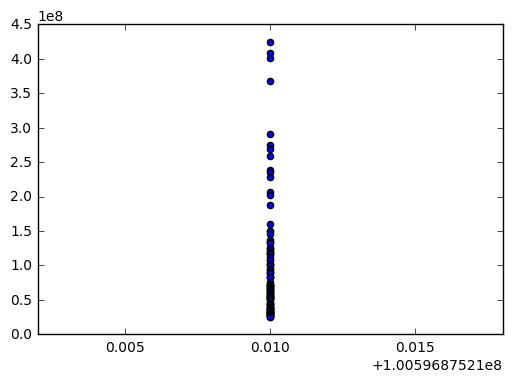

In [54]:
plt.scatter(predictions, Y)

In [60]:
res = predictions - Y

list_num = list(range(100))

res_array = res.as_matrix()

plt.hist(res_array)

The residuals are skewed to the right on the histogram, meaning that the residuals are pretty high.

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [75]:
df = df.fillna(df.median())

In [76]:
X = df[['Constant', 'Budget']]
Y = df[['DomesticTotalGross']]

In [78]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lr.coef_

array([[ 0.        ,  0.78879399]])

In [80]:
predictions = lr.predict(df[['Constant', 'Budget']])

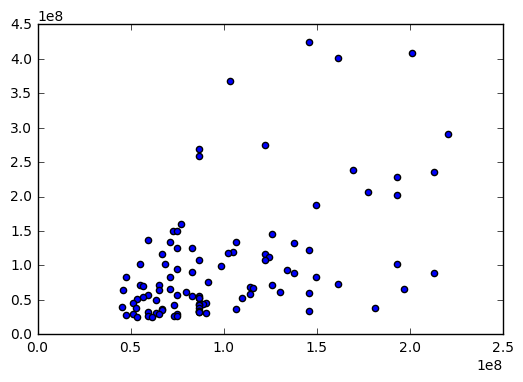

In [81]:
plt.scatter(predictions, Y)

(array([  3.,   1.,   2.,   1.,   6.,  11.,  28.,  37.,   7.,   4.]),
 array([ -2.78774677e+08,  -2.36594547e+08,  -1.94414417e+08,
         -1.52234287e+08,  -1.10054156e+08,  -6.78740264e+07,
         -2.56938962e+07,   1.64862339e+07,   5.86663641e+07,
          1.00846494e+08,   1.43026624e+08]),
 <a list of 10 Patch objects>)

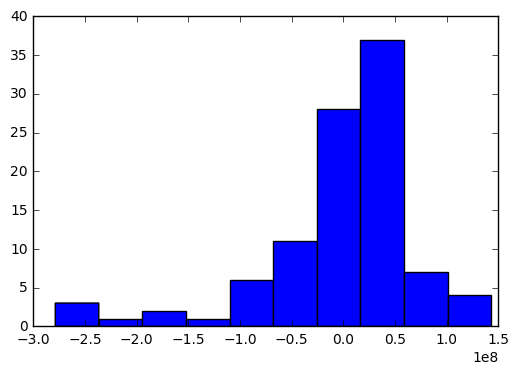

In [82]:
res = predictions - Y

list_num = list(range(100))

res_array = res.as_matrix()

plt.hist(res_array)

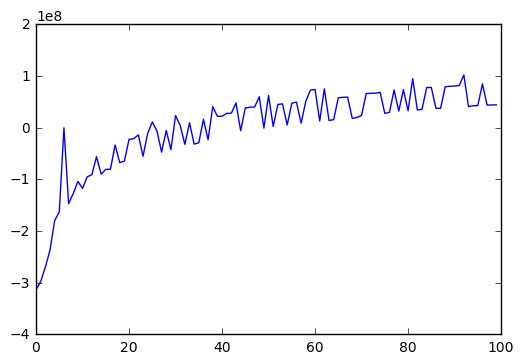

In [106]:
plt.plot(res)

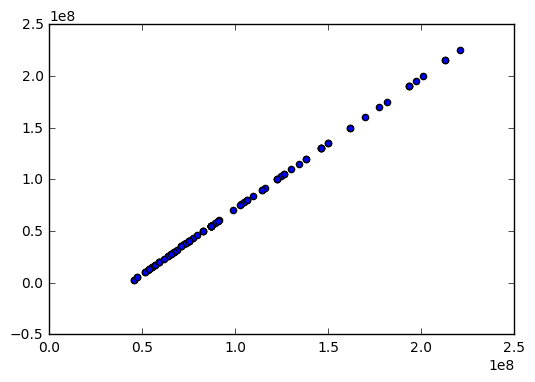

In [84]:
# Plot prediction against variable budget

plt.scatter(predictions, df['Budget'])

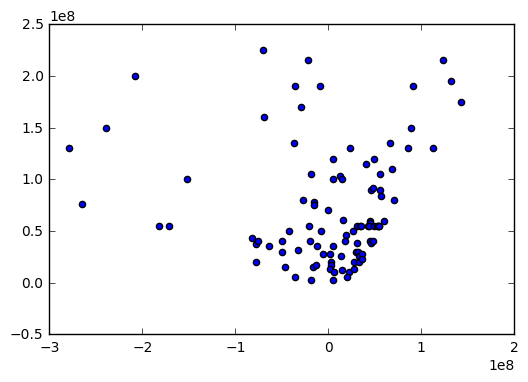

In [85]:
# Plot residuals against variable budget

plt.scatter(res, df['Budget'])

The plot of predictions and variable budget is a straight line because this is the only non-constant numeric vairable in the model, so the prediciton is just a linear transformation of that number, therefore showing a straight line.

The plot of residuals and variable budget looks like random numbers scattered around, this is because a lot of variances in the gross cannot be captured since there is not enough variables in the model.

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [87]:
RatingDummies = pd.get_dummies(df['Rating'])

In [90]:
df = pd.concat([df, RatingDummies], axis = 1)

In [93]:
X = df[['Constant', 'G', 'PG', 'PG-13', 'R']]
Y = df[['DomesticTotalGross']]

In [94]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
lr.coef_

array([[  0.00000000e+00,   1.23250094e+08,  -1.41069535e+07,
         -3.37929005e+07,  -7.53502405e+07]])

In [96]:
predictions = lr.predict(X)

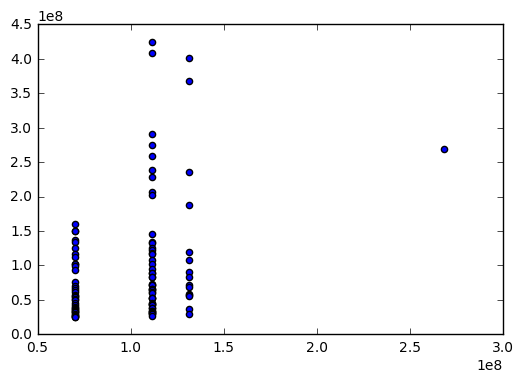

In [98]:
plt.scatter(predictions, Y)

In [101]:
res = predictions - Y

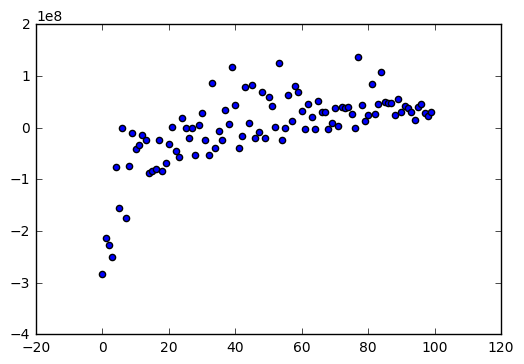

In [119]:
plt.scatter(list_num, res)

This looks similar to challenge 1, but the model is better since there are more variance in the predictor variables based on different types of ratings. The model is capturing some variance in gross but the residual shows jumps and is still not ideal.

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

I will add budget and rating to the model.

In [107]:
X = df[['Budget', 'G', 'PG', 'PG-13', 'R']]
Y = df[['DomesticTotalGross']]

In [108]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
lr.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [112]:
lr.coef_

array([[  7.72043312e-01,   1.34992741e+08,  -3.24225267e+07,
         -5.00737837e+07,  -5.24964303e+07]])

In [113]:
predictions = lr.predict(X)

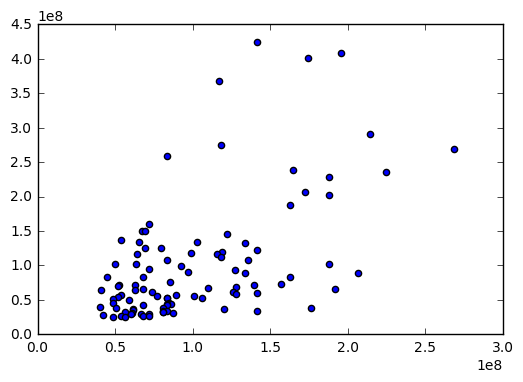

In [114]:
plt.scatter(predictions, Y)

In [115]:
res = predictions - Y

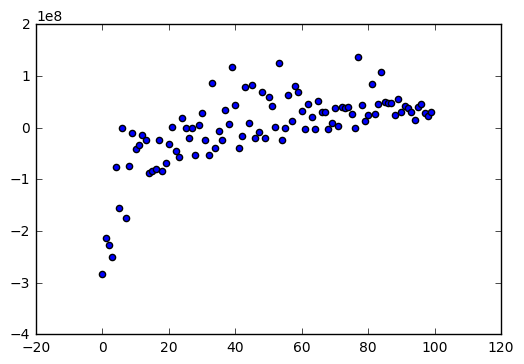

In [118]:
plt.scatter(list_num, res)

#### Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [123]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.25)

In [124]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
lr.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [126]:
lr.coef_

array([[  1.03194841e+00,   1.38062141e+08,  -5.07681978e+07,
         -4.05223461e+07,  -4.67715974e+07]])

In [127]:
predictions = lr.predict(X_test)

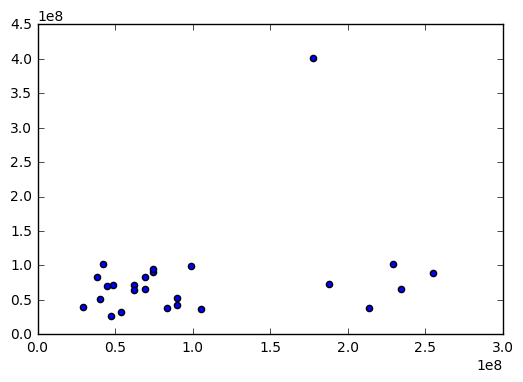

In [128]:
plt.scatter(predictions, Y_test)